<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Linear Regression
    </div>
<br><br>
<font size=4>
   **Name**: Neda Fallah<br>
   **Student ID**: 98100226<br> <br>

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 1: Linear Regression Model (40 + 30 optional points)
According to <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_02_Classical_Models/Linear%20regression.ipynb"><font face="Roboto">Linear Regression Notebook</font></a>, train a linear regression model on an arbitrary dataset. Explain your chosen dataset and split your data into train and test sets, then predict values for the test set using your trained model. Try to find the best hyperparameters for your model. (Using Lasso Regression, Ridge Regression or Elastic Net and comparing them will have extra optional points)
<br> Explain each step of your workflow.

In [10]:
#TODO
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [15]:
#Import dataset(it is uploaded in the practical folder) and take two columns temp and humidity from it.
#In this exercise we want to study the influence of temperature on humidity.

df = pd.read_csv('weatherHistory.csv')
df_binary = df[['Temperature (C)', 'Humidity']]
  
# Taking only the selected two attributes from the dataset
df_binary.columns = ['Temp', 'Humidity']
#display the first 5 rows
df_binary.head()

,Temp,Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


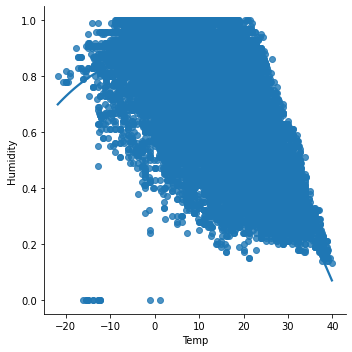

In [16]:
#plot two columns
sns.lmplot(x ="Temp", y ="Humidity", data = df_binary, order = 2, ci = None)

In [17]:
#fill null methods as a data preprocessing step 
df_binary.fillna(method ='ffill', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [18]:
#Divide to test/train

  
# Converting each dataframe into a numpy array 
X = np.array(df_binary['Temp']).reshape(-1, 1)
y = np.array(df_binary['Humidity']).reshape(-1, 1)

#Each dataframe contains only one column.  Dropping any rows with Nan.
df_binary.dropna(inplace = True)


# Splitting the data into training and testing data. 75% of data is the train data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [23]:
#Fit linear regression

regr = LinearRegression()
regr.fit(X_train, y_train)


# Predict a Response and print it:
y_pred = regr.predict(X_test)
print('Predicted response:', y_pred, sep='\n')


# Print the Intercept:
print('intercept:', regr.intercept_)

# Print the Slope:
print('slope:', regr.coef_) 



Predicted response:
[[0.83038443]
 [0.62548319]
 [0.84827602]
 ...
 [0.85906777]
 [0.73808658]
 [0.75683014]]
R-Squared: 0.4142598177499004
intercept: [0.88008328]
slope: [[-0.0127797]]


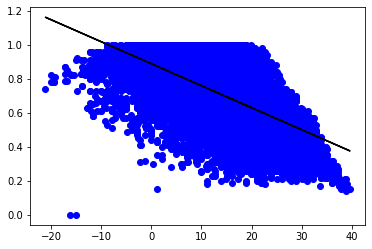

In [ ]:
#plot linear regression line on data
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()
# Data scatter of predicted values

In [30]:
#Metrics: erros of linear regression : mean abs and mean squared, R squared
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

'''
R-Squared, is a statistical measure in a regression model that determines the proportion of variance
in the dependent variable that can be explained by the independent variable. It is used to measure goodness of fit.
 '''
print('R-Squared:', r2_score(y_test, y_pred))


  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

R-Squared: 0.4142598177450998
MAE: 0.12115276654665848
MSE: 0.02249283703808067
RMSE: 0.1499761215596692


In [40]:
#ridge regression and errors
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#first we scale the data

scaler = StandardScaler().fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

# define model
model = Ridge(alpha=0.01) 

# fit model
model.fit(X_train_new, y_train) 
#predict
pred_test_rr = model.predict(X_test_new)
#see metrics
print("RMSE for test in ridge:", np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("R2 for ridge", r2_score(y_test, pred_test_rr))




RMSE for test in ridge: 0.14997618349393
R2 for ridge 0.4142593339695183


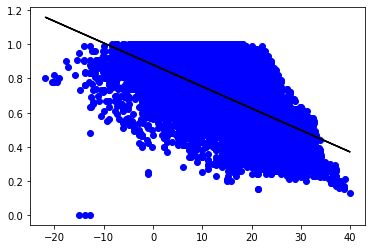

In [29]:
y_pred = rr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()
# Data scatter of predicted values

In [41]:
#lasso regression
#same stuff as for ridge
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

0.14998164010407516
0.4142167109805951


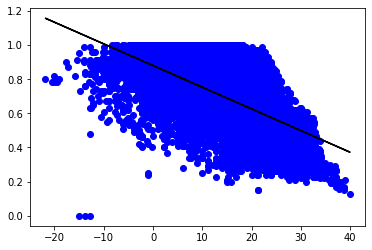

In [42]:
y_pred = model_lasso.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()
# Data scatter of predicted values



#?????? WHY ARE ALL THE SAME?XS

In [54]:
#Elastic Net
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha =0.1,random_state = 0)
ENreg.fit(X_train, y_train)
pred_test_EN= ENreg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_EN)) )
print(r2_score(y_test, pred_test_EN))

0.15007640635057176
0.41347622005960116


In [56]:
'''
After trying different hyperparameters for riidge, lasso and elasticnet, I found out the best parameter
for them creates the same results as linear regression!
'''

'\nAfter trying different hyperparameters for riidge, lasso and elasticnet, I found out the best parameter\nfor them creates the same results as linear regression!\n\n'